In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
def gradient_descent(x,y,lr,it):
    C =[]
    m_curr = b_curr = 0
    iterations = it
    n = len(x)
    learning_rate = lr
    for _ in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        C.append(cost)
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
    return m_curr,b_curr,C

In [4]:
df = pd.read_csv(r"C:\Users\Naveen\OneDrive\Desktop\archive\Real estate.csv")
df = df.set_index(["No"])
train_dataset = df.loc[:350]
x_train = train_dataset["X4 number of convenience stores"]
y_train = train_dataset["Y house price of unit area"]
[m,c,C] = gradient_descent(np.array(x_train),np.array(y_train),0.005,400)
m,c

(3.794624942055707, 20.22718342976588)

[5.937141950996914, 5.976738498219997, 6.60121269327302, 6.505517514217623, 6.405053370655901]
[7.2202604518129485, 1.6843869632227049, 3.1335942316042233, 3.765171358379086, 4.379316026028416]


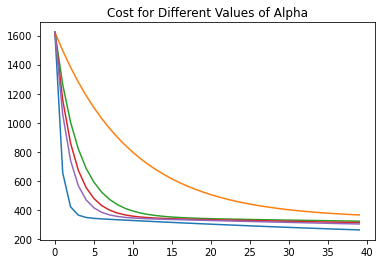

In [5]:
#convergence
diff_alpha = [0.01,0.001,0.003,0.004,0.005]
weights = []
bias = []
Cost = []
plt.figure()
for i in range(len(diff_alpha)):
    [m,c,C] = gradient_descent(np.array(x_train),np.array(y_train),diff_alpha[i],40)
    weights.append(m)
    bias.append(c)
    Cost.append(C)
    plt.plot(C)
plt.title("Cost for Different Values of Alpha")
print(weights)
print(bias)

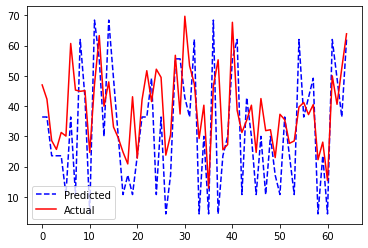

In [10]:
test_dataset = df.loc[350:]
x_test = test_dataset["X4 number of convenience stores"]
y_test = test_dataset["Y house price of unit area"]
predicted = []
for i,j in zip(x_test,y_test):
    t = ((i*m)+c)
    predicted.append(t)
plt.plot(predicted,'b--',label="Predicted")
plt.plot(np.array(y_test),'r',label="Actual")
plt.legend()

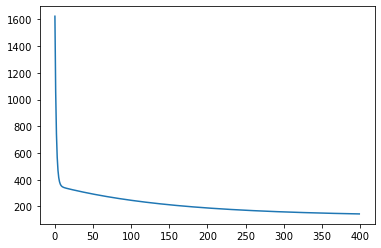

In [78]:
plt.plot(C)

In [83]:
def gradient_descent_multi(X, y, alpha, epoch):
    m = X.shape[0] 
   
    ones =np.ones((m,1))  
    X = np.concatenate((ones, X), axis=1)   
    n = X.shape[1]   # 
    Theta = np.ones(n)    
    h = np.dot(X, Theta)   

    
    cost = np.ones(epoch)
    for i in range (0, epoch):
        Theta[0] = Theta[0] - (alpha/X.shape[0]) * sum(h-y)
        for j in range(1, n):
              Theta[j]= Theta[j] - (alpha/X.shape[0]) * sum((h-y) * X[:, j])
        h  = np.dot(X, Theta)
        cost[i] = 1/(2*m) * sum(np.square(h-y)) 
    return Theta,list(cost)



In [7]:
s = np.array([[1,2,3],[3,4,5]])
s.shape[0]

2

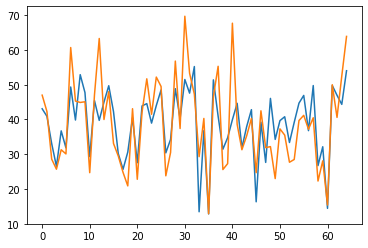

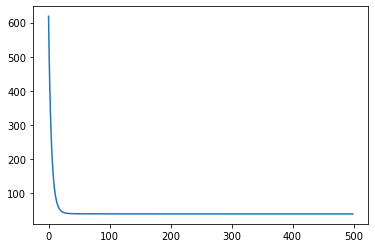

In [127]:
new_df = pd.read_csv(r"C:\Users\Naveen\OneDrive\Desktop\archive\Real estate.csv")
new_df = new_df.set_index(["No"])
new_df = new_df.rename(columns={'X1 transaction date':0,
                        'X2 house age':1,
                        'X3 distance to the nearest MRT station':2,
                        'X4 number of convenience stores':3,
                        'X5 latitude':4,
                        'X6 longitude':5
                       })
df = new_df[list(range(0,6))]
mu = np.mean(df,axis=0)
sigma = np.std(df, axis= 0, ddof = 1)
X_norm = (df - mu)/sigma
df = X_norm
train_dataset = df.loc[:350]
label_set = new_df["Y house price of unit area"].loc[:350]
x_train = train_dataset[list(range(0,6))]
y_train = label_set
weights,cost=gradient_descent_multi(x_train, y_train, 0.1, 500)
test_dataset = df.loc[350:]
x_test = test_dataset[list(range(0,6))]
y_test = new_df["Y house price of unit area"].loc[350:]

m1 = x_test.shape[0]  # number of samples
ones =np.ones((m1,1))  
x_test = np.concatenate((ones, x_test), axis=1)   
    
a = np.dot(x_test,weights)
plt.plot(a)
plt.plot(np.array(y_test))
plt.figure()
plt.plot(cost)

[37.78807348  1.48404466 -3.16704298 -3.47288346  3.57451789  3.52799035
  1.33127928]
[24.46684611  1.3385525  -1.35515636 -2.07144238  3.11013799  3.34321699
  2.77701302]
[29.87409925  1.41596171 -1.98830394 -2.38785965  3.28182844  3.51121073
  2.61525345]
[33.14275508  1.45488309 -2.41240408 -2.59227277  3.37476279  3.5688322
  2.3872434 ]
[36.28503739  1.48001311 -2.88065251 -2.92111764  3.48940552  3.58733993
  1.95780781]
[array([37.78807348,  1.48404466, -3.16704298, -3.47288346,  3.57451789,
        3.52799035,  1.33127928]), array([24.46684611,  1.3385525 , -1.35515636, -2.07144238,  3.11013799,
        3.34321699,  2.77701302]), array([29.87409925,  1.41596171, -1.98830394, -2.38785965,  3.28182844,
        3.51121073,  2.61525345]), array([33.14275508,  1.45488309, -2.41240408, -2.59227277,  3.37476279,
        3.5688322 ,  2.3872434 ]), array([36.28503739,  1.48001311, -2.88065251, -2.92111764,  3.48940552,
        3.58733993,  1.95780781])]


Text(0.5, 1.0, 'Costs for different Learning Rate')

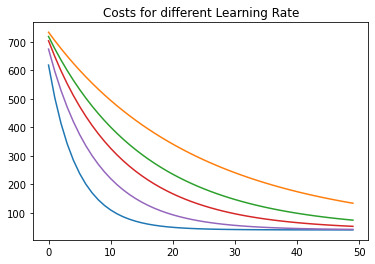

In [130]:
alpha = [0.1,0.02,0.03,0.04,0.06]
plt.figure()
dicte = []
for i in range(len(alpha)):
    weights,cost=gradient_descent_multi(x_train, y_train, alpha[i], 50)
    plt.plot(cost)
    print(weights)
    dicte.append(weights)
    
print(dicte)
plt.title("Costs for different Learning Rate")

In [112]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)
model.intercept_

37.986824997510666

[]

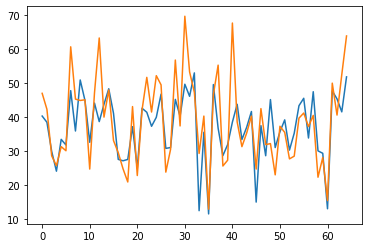

In [109]:
test_dataset = df.loc[350:]
x_test = test_dataset[list(range(0,6))]
y_test = new_df["Y house price of unit area"].loc[350:]

m1 = x_test.shape[0]  # number of samples
ones =np.ones((m1,1))  
x_test = np.concatenate((ones, x_test), axis=1)   
    
a = np.dot(x_test,weights)
plt.plot(a)
plt.plot(np.array(y_test))
plt.plot()

In [66]:
np.array(y_test)

array([47. , 42.3, 28.6, 25.7, 31.3, 30.1, 60.7, 45.3, 44.9, 45.1, 24.7,
       47.1, 63.3, 40. , 48. , 33.1, 29.5, 24.8, 20.9, 43.1, 22.8, 42.1,
       51.7, 41.5, 52.2, 49.5, 23.8, 30.5, 56.8, 37.4, 69.7, 53.3, 47.3,
       29.3, 40.3, 12.9, 46.6, 55.3, 25.6, 27.3, 67.7, 38.6, 31.3, 35.3,
       40.3, 24.7, 42.5, 31.9, 32.2, 23. , 37.3, 35.5, 27.7, 28.5, 39.7,
       41.2, 37.2, 40.5, 22.3, 28.1, 15.4, 50. , 40.6, 52.5, 63.9])

In [13]:
a = np.array([[1,2,3,4,5,5],[9,1,2,3,4,5],[0,8,1,23,4,7]])
b = np.array([-1,-1,-1,1,1,1])
np.dot(a,b)

array([ 8,  0, 25])